Importing list of Coffee Shops that work with specialty coffee

# What´s the best place for a new Specialty Coffee Shop in São Paulo?

### Introduction

Is it possible to determine the best place to start a new Specialty Coffee Shop business?<br>
According to the Specialty Coffee Association of America (SCAA), coffee which scores 80 points or above on a 100-point scale is graded "specialty."<br>
Brazil is the top coffee producer nation and one of the top 15 consumer.<br>
As Specialty Coffee usually costs higher them regular coffee, using information of regions human development index (HDI) and per capita income, I will check if it is possible to determine the better location for a new business.<br>

#### Data Description

-  A list of some of the TOP Specialty Coffee Shops in São Paulo. Provided by a group of coffee lovers;

-  A list of all coffee shops of São Paulo got from Foursquare API;

-  Human Development Index by neighborhood got from Wikipedia.

-  A list containing the center coordinates of the each neighborhood in São Paulo.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
cf_list = pd.read_csv("cafeterias_especiais.csv", delimiter=';')
cf_list.head()

,Name,Address,Neighborhood
0,COFFEE LAB,"Rua Fradique Coutinho, 1340",Vila Madalena
1,UM COFFEE CO.,"Rua Julio Conceicao, 553",Bom Retiro
2,UM COFFEE CO.,"Rua Iaia, 62",Itaim Bibi
3,POR UM PUNHADO DE DoLARES,"Rua Nestor Pestana, 115",Consolacao
4,URBE CAFe,"Rua Antonio Carlos, 404",Consolacao


In [3]:
cf_list = cf_list.astype(str)

Creating Lat Long of Coffee Shops list

In [4]:
latlong = pd.DataFrame({'Lat':[], 'Long':[]})
latlong

,Lat,Long


In [5]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

for i in cf_list.Address:
    address = i
    geolocator = Nominatim(user_agent="sp_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latlong = latlong.append({'Lat': latitude, 'Long': longitude}, ignore_index=True)

latlong

,Lat,Long
0,-23.556041,-46.691383
1,-23.527525,-46.641472
2,-5.806105,-35.235661
3,-23.548556,-46.645346
4,-16.578470,-43.936821
5,-23.559819,-46.677229
6,-23.568654,-46.690946
7,-23.611181,-46.655530
8,-23.563975,-46.683830
9,-23.555726,-46.690367


In [6]:
cf_list['Lat'] = latlong['Lat'].values

In [7]:
cf_list['Long'] = latlong['Long'].values

In [8]:
cf_list["Neighborhood"]= cf_list["Neighborhood"].str.upper() 

In [9]:
cf_list["Name"]= cf_list["Name"].str.upper() 

In [10]:
cf_list

,Name,Address,Neighborhood,Lat,Long
0,COFFEE LAB,"Rua Fradique Coutinho, 1340",VILA MADALENA,-23.556041,-46.691383
1,UM COFFEE CO.,"Rua Julio Conceicao, 553",BOM RETIRO,-23.527525,-46.641472
2,UM COFFEE CO.,"Rua Iaia, 62",ITAIM BIBI,-5.806105,-35.235661
3,POR UM PUNHADO DE DOLARES,"Rua Nestor Pestana, 115",CONSOLACAO,-23.548556,-46.645346
4,URBE CAFE,"Rua Antonio Carlos, 404",CONSOLACAO,-16.578470,-43.936821
5,SOFA CAFE,"Rua Artur de Azevedo, 514",PINHEIROS,-23.559819,-46.677229
6,SOFA CAFE,"Rua Bianchi Bertoldi, 130",PINHEIROS,-23.568654,-46.690946
7,FREAK CAFE,"Avenida Jurema, 359",MOEMA,-23.611181,-46.655530
8,KING OF THE FORK,"Rua Artur de Azevedo, 1317",PINHEIROS,-23.563975,-46.683830
9,CUPPING CAFE,"Rua Wisard, 171",VILA MADALENA,-23.555726,-46.690367


In [11]:
cf_list.shape

(11, 5)

In [12]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

# All requested packages already installed.



In [13]:
latitude = -23.533773
longitude = -46.625290

In [14]:
# create map of São Paulo using latitude and longitude values
map_sp = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, name, neighborhood in zip(cf_list['Lat'], cf_list['Long'], cf_list['Name'], cf_list['Neighborhood']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)  
    
map_sp

Let´s plot the Coffee Shop list in a map

Looks like URBE CAFÉ returned a wrong lat/long. Googleing it, the correct values are -23.555976,-46.658366. Let´s correct it in our df.

In [15]:
cf_list.iloc[4, 4] = -46.658366

In [16]:
cf_list.iloc[4, 3] = -23.555976

In [17]:
cf_list.iloc[2, 3] = -23.5863963

In [18]:
cf_list.iloc[2, 4] = -46.6779664

In [19]:
# create map of São Paulo using latitude and longitude values
map_sp = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, name, neighborhood in zip(cf_list['Lat'], cf_list['Long'], cf_list['Name'], cf_list['Neighborhood']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)  
    
map_sp

In [20]:
idh = pd.read_csv("IDH.csv", delimiter=';')
idh.head()

,Posicao,Distrito,IDH
0,1,Moema,"0,981"
1,2,Pinheiros,"0,98"
2,3,Perdizes,"0,977"
3,4,Jardim Paulista,"0,975"
4,5,Alto de Pinheiros,"0,972"


In [21]:
idh.drop('Posicao', axis=1, inplace=True)
idh.rename(index=str, columns={'Distrito ' : 'Distrito'}, inplace=True)
idh['Distrito'] = idh['Distrito'].str.strip()
idh['IDH'] = idh['IDH'].str.replace(',','.')
idh.sort_values(by='IDH', ascending=False, inplace=True)
idh["IDH"] = pd.to_numeric(idh["IDH"])
idh['Distrito'] = idh['Distrito'].astype(str)
idh['Distrito'] = idh['Distrito'].str.upper()
idh.head()

,Distrito,IDH
0,MOEMA,0.981
1,PINHEIROS,0.980
2,PERDIZES,0.977
3,JARDIM PAULISTA,0.975
4,ALTO DE PINHEIROS,0.972


Now let´s analyse São Paulo´s HDI

In [22]:
idh.shape

(96, 2)

Let´s create our dataframe of São Paulo with neighbors and latlong.

In [23]:
bairros = pd.read_csv('bairros.txt', sep=';')
bairros.head()

,id_municipio,id_bairro,uf,municipio,bairro,longitude,latitude
0,2,42570,AC,Acrelandia,Centro,-67.842841,-9.979536
1,3,42571,AC,Assis Brasil,Centro,-50.420166,-22.665752
2,4,42572,AC,Brasileia,Centro,-67.842841,-9.979536
3,5,42573,AC,Bujari,Centro,-67.826803,-9.935254
4,6,42574,AC,Capixaba,Centro,-67.828711,-9.981754


In [24]:
bairros_sp = bairros.loc[(bairros['uf'] == 'SP') & (bairros['municipio'] == 'Sao Paulo')]
bairros_sp.head()

,id_municipio,id_bairro,uf,municipio,bairro,longitude,latitude
33675,5296,76162,SP,Sao Paulo,Aclimacao,-46.630972,-23.571487
33676,5296,76163,SP,Sao Paulo,Alto da Boa Vista,-46.692066,-23.635254
33677,5296,76164,SP,Sao Paulo,Alto da Lapa,-46.717820,-23.535388
33678,5296,76165,SP,Sao Paulo,Alto da Mooca,-46.587312,-23.564019
33679,5296,76166,SP,Sao Paulo,Alto da Riviera,-46.763657,-23.699916


In [25]:
bairros_sp.reset_index(inplace=True)
bairro = bairros_sp.drop(['index', 'id_municipio', 'id_bairro'], axis=1)

In [26]:
bairro.head()

,uf,municipio,bairro,longitude,latitude
0,SP,Sao Paulo,Aclimacao,-46.630972,-23.571487
1,SP,Sao Paulo,Alto da Boa Vista,-46.692066,-23.635254
2,SP,Sao Paulo,Alto da Lapa,-46.717820,-23.535388
3,SP,Sao Paulo,Alto da Mooca,-46.587312,-23.564019
4,SP,Sao Paulo,Alto da Riviera,-46.763657,-23.699916


In [27]:
bairro.bairro = bairro.bairro.astype(str)

In [28]:
bairro.bairro = bairro.bairro.str.upper()

In [29]:
bairro.head()

,uf,municipio,bairro,longitude,latitude
0,SP,Sao Paulo,ACLIMACAO,-46.630972,-23.571487
1,SP,Sao Paulo,ALTO DA BOA VISTA,-46.692066,-23.635254
2,SP,Sao Paulo,ALTO DA LAPA,-46.717820,-23.535388
3,SP,Sao Paulo,ALTO DA MOOCA,-46.587312,-23.564019
4,SP,Sao Paulo,ALTO DA RIVIERA,-46.763657,-23.699916


In [30]:
bairros_idh = bairro.set_index('bairro').join(idh.set_index('Distrito'))

In [31]:
bairros_idh.dropna(axis='rows', inplace=True)

In [32]:
bairros_idh.shape

(88, 5)

In [33]:
bairros_idh.reset_index(inplace=True)

In [34]:
bairros_idh.head()

,bairro,uf,municipio,longitude,latitude,IDH
0,ALTO DE PINHEIROS,SP,Sao Paulo,-46.708835,-23.553709,0.972
1,ARICANDUVA,SP,Sao Paulo,-46.511026,-23.579519,0.886
2,ARTUR ALVIM,SP,Sao Paulo,-46.477195,-23.548751,0.833
3,BARRA FUNDA,SP,Sao Paulo,-46.657432,-23.530376,0.920
4,BELA VISTA,SP,Sao Paulo,-46.646259,-23.562831,0.940


Download a list of coffee shops for each neighborhood from Foursquare

In [35]:
CLIENT_ID = 'LBSKSHMKF53O1YGE4SQLCOTYBZU4ZKN4V11KJI1G5WEBN3KR' # your Foursquare ID
CLIENT_SECRET = '0ERKFMXE3KMZBJS3VOQA20H5AUWW4JGKVRU1GE0130ZGABCM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LBSKSHMKF53O1YGE4SQLCOTYBZU4ZKN4V11KJI1G5WEBN3KR
CLIENT_SECRET:0ERKFMXE3KMZBJS3VOQA20H5AUWW4JGKVRU1GE0130ZGABCM


In [36]:
neighborhood_latitude = bairros_idh.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = bairros_idh.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = bairros_idh.loc[0, 'bairro'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of ALTO DE PINHEIROS are -23.553709299999998, -46.708834700000004.


In [37]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 250 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=LBSKSHMKF53O1YGE4SQLCOTYBZU4ZKN4V11KJI1G5WEBN3KR&client_secret=0ERKFMXE3KMZBJS3VOQA20H5AUWW4JGKVRU1GE0130ZGABCM&v=20180605&ll=-23.553709299999998,-46.708834700000004&radius=250&limit=100'

In [38]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c98bf696a60715342d6fb2c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Alto de Pinheiros',
  'headerFullLocation': 'Alto de Pinheiros, São Paulo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 14,
  'suggestedBounds': {'ne': {'lat': -23.551459297749997,
    'lng': -46.70638478636958},
   'sw': {'lat': -23.55595930225, 'lng': -46.711284613630426}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc13e22b492d13a35dca560',
       'name': 'Droga Raia',
       'location': {'address': 'Pça. Panamericana, 57',
        'lat': -23.554749835629302,
        'lng': -46.70908177557127,
        'labeledLatLngs': [{'label': 'display',


In [39]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Droga Raia,Pharmacy,-23.554750,-46.709082
1,Pão de Açúcar ( Antigo Sé),Market,-23.552717,-46.708607
2,Senzala Bar & Grill,Bar,-23.554694,-46.708755
3,Praça Panamericana,Plaza,-23.553641,-46.708943
4,Senzala Restaurante,Restaurant,-23.554763,-46.708244
5,Pão de Açúcar,Supermarket,-23.553873,-46.709937
6,Leo Dolci,Café,-23.553818,-46.707798
7,Shell Select,Convenience Store,-23.554534,-46.709732
8,McDonald's,Fast Food Restaurant,-23.553399,-46.707660
9,AUTO POSTO MINGO,Convenience Store,-23.554517,-46.709661


In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

14 venues were returned by Foursquare.


In [43]:
sp_venues = getNearbyVenues(names=bairros_idh['bairro'],
                                   latitudes=bairros_idh['latitude'],
                                   longitudes=bairros_idh['longitude']
                                  )

ALTO DE PINHEIROS
ARICANDUVA
ARTUR ALVIM
BARRA FUNDA
BELA VISTA
BELEM
BOM RETIRO
BRASILANDIA
BRAS
BUTANTA
CACHOEIRINHA
CAMBUCI
CAMPO BELO
CAMPO GRANDE
CAMPO LIMPO
CANGAIBA
CAPAO REDONDO
CARRAO
CASA VERDE
CIDADE ADEMAR
CIDADE DUTRA
CIDADE LIDER
CIDADE TIRADENTES
CONSOLACAO
CURSINO
ERMELINO MATARAZZO
FREGUESIA DO O
GRAJAU
IGUATEMI
IPIRANGA
ITAIM BIBI
ITAIM PAULISTA
ITAQUERA
JABAQUARA
JAGUARE
JARAGUA
JARDIM HELENA
JARDIM PAULISTA
JARDIM SAO LUIS
JACANA
JOSE BONIFACIO
LAJEADO
LAPA
LIBERDADE
LIMAO
MANDAQUI
MORUMBI
MOOCA
PARELHEIROS
PARI
PARQUE DO CARMO
PEDREIRA
PERDIZES
PERUS
PINHEIROS
PIRITUBA
PONTE RASA
RAPOSO TAVARES
REPUBLICA
RIO PEQUENO
SACOMA
SANTA CECILIA
SANTANA
SANTO AMARO
SAPOPEMBA
SAUDE
SOCORRO
SAO DOMINGOS
SAO LUCAS
SAO MATEUS
SAO MIGUEL PAULISTA
SE
TATUAPE
TREMEMBE
TUCURUVI
VILA ANDRADE
VILA CURUCA
VILA FORMOSA
VILA GUILHERME
VILA JACUI
VILA LEOPOLDINA
VILA MARIA
VILA MARIANA
VILA MATILDE
VILA MEDEIROS
VILA PRUDENTE
VILA SONIA
AGUA RASA


In [44]:
print(sp_venues.shape)
sp_venues.head()

(2846, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALTO DE PINHEIROS,-23.553709,-46.708835,Droga Raia,-23.554750,-46.709082,Pharmacy
1,ALTO DE PINHEIROS,-23.553709,-46.708835,Pão de Açúcar ( Antigo Sé),-23.552717,-46.708607,Market
2,ALTO DE PINHEIROS,-23.553709,-46.708835,Senzala Bar & Grill,-23.554694,-46.708755,Bar
3,ALTO DE PINHEIROS,-23.553709,-46.708835,Praça Panamericana,-23.553641,-46.708943,Plaza
4,ALTO DE PINHEIROS,-23.553709,-46.708835,Senzala Restaurante,-23.554763,-46.708244,Restaurant


In [45]:
array = ['Coffee Shop', 'Café']
sp_coffee = sp_venues.loc[sp_venues['Venue Category'].isin(array)]

In [46]:
sp_coffee.shape

(104, 7)

In [47]:
sp_coffee.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,ALTO DE PINHEIROS,-23.553709,-46.708835,Leo Dolci,-23.553818,-46.707798,Café
39,BARRA FUNDA,-23.530376,-46.657432,Maná Doçaria e Café,-23.529816,-46.656263,Coffee Shop
94,BELA VISTA,-23.562831,-46.646259,Moscatel Doceria e Bar de Açúcar,-23.558924,-46.646283,Café
128,BELA VISTA,-23.562831,-46.646259,Canoleria Do Bixiga,-23.559480,-46.646260,Café
131,BELA VISTA,-23.562831,-46.646259,Café Família,-23.559764,-46.649551,Café


In [48]:
sp_coffee_count = sp_coffee.groupby('Neighborhood').count()

In [49]:
sp_coffee_count.sort_values(by='Neighborhood Latitude', inplace=True)

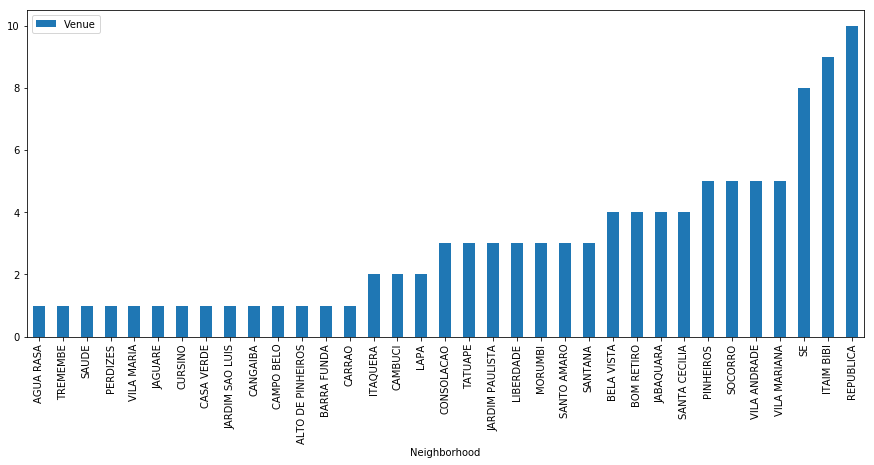

In [50]:
sp_coffee_count.plot.bar(y='Venue', figsize=(15, 6))

In [51]:
sp_coffee_count.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AGUA RASA,1,1,1,1,1,1
TREMEMBE,1,1,1,1,1,1
SAUDE,1,1,1,1,1,1
PERDIZES,1,1,1,1,1,1
VILA MARIA,1,1,1,1,1,1


In [52]:
bairros_idh_count = sp_coffee_count.join(bairros_idh.set_index('bairro'))

In [53]:
bairros_idh_count.sort_values(by='IDH', inplace=True)

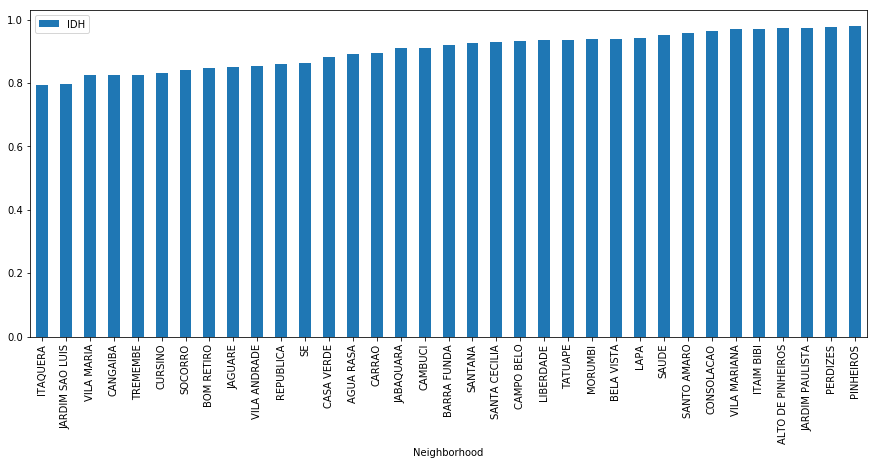

In [54]:
bairros_idh_count.plot.bar(y='IDH', figsize=(15, 6))

In [55]:
bairros_idh_count.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,uf,municipio,longitude,latitude,IDH
Neighborhood,,,,,,,,,,,
ITAQUERA,2,2,2,2,2,2,SP,Sao Paulo,-46.453654,-23.539612,0.795
JARDIM SAO LUIS,1,1,1,1,1,1,SP,Sao Paulo,-46.662434,-23.575878,0.796
VILA MARIA,1,1,1,1,1,1,SP,Sao Paulo,-46.596753,-23.527358,0.824
CANGAIBA,1,1,1,1,1,1,SP,Sao Paulo,-46.527094,-23.505050,0.825
TREMEMBE,1,1,1,1,1,1,SP,Sao Paulo,-45.547962,-22.957632,0.826


In [56]:
bairros_idh_count.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category', 'uf', 'municipio'], axis='columns', inplace=True)

In [57]:
bairros_idh_count.head()

,Venue,longitude,latitude,IDH
Neighborhood,,,,
ITAQUERA,2,-46.453654,-23.539612,0.795
JARDIM SAO LUIS,1,-46.662434,-23.575878,0.796
VILA MARIA,1,-46.596753,-23.527358,0.824
CANGAIBA,1,-46.527094,-23.505050,0.825
TREMEMBE,1,-45.547962,-22.957632,0.826


In [58]:
bairros_idh_count.reset_index(inplace=True)

In [59]:
bairros_idh_count.head()

,Neighborhood,Venue,longitude,latitude,IDH
0,ITAQUERA,2,-46.453654,-23.539612,0.795
1,JARDIM SAO LUIS,1,-46.662434,-23.575878,0.796
2,VILA MARIA,1,-46.596753,-23.527358,0.824
3,CANGAIBA,1,-46.527094,-23.505050,0.825
4,TREMEMBE,1,-45.547962,-22.957632,0.826


In [60]:
from sklearn.cluster import KMeans

In [61]:
# set number of clusters
kclusters = 3

bairros_idh_count_cluster = bairros_idh_count.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bairros_idh_count_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 2], dtype=int32)

In [62]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2], dtype=int32)

In [63]:
#bairros_idh_count.drop('Cluster Labels', axis=1, inplace=True)

In [64]:
bairros_idh_count.insert(0, 'Cluster Labels', kmeans.labels_)

In [65]:
bairros_idh_count

,Cluster Labels,Neighborhood,Venue,longitude,latitude,IDH
0,0,ITAQUERA,2,-46.453654,-23.539612,0.795
1,0,JARDIM SAO LUIS,1,-46.662434,-23.575878,0.796
2,0,VILA MARIA,1,-46.596753,-23.527358,0.824
3,0,CANGAIBA,1,-46.527094,-23.505050,0.825
4,0,TREMEMBE,1,-45.547962,-22.957632,0.826
5,0,CURSINO,1,-46.625539,-23.602992,0.830
6,2,SOCORRO,5,-46.528297,-22.590591,0.841
7,2,BOM RETIRO,4,-46.640706,-23.525670,0.847
8,0,JAGUARE,1,-46.747535,-23.544275,0.849
9,2,VILA ANDRADE,5,-46.737464,-23.632063,0.855


In [66]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
# create map
map_sp = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bairros_idh_count['latitude'], bairros_idh_count['longitude'], bairros_idh_count['Neighborhood'], bairros_idh_count['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_sp)
       
# add markers to map
for lat, lng, name, neighborhood in zip(cf_list['Lat'], cf_list['Long'], cf_list['Name'], cf_list['Neighborhood']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)  
    
map_sp

In [67]:
cf = cf_list.groupby('Neighborhood').count()

In [79]:
lista = bairros_idh_count.set_index('Neighborhood').join(cf)

In [69]:
#lista.dropna(axis=0, inplace=True)

In [82]:
lista.count()

Cluster Labels    35
Venue             35
longitude         35
latitude          35
IDH               35
Name               4
Address            4
Lat                4
Long               4
dtype: int64

In [83]:
lista.drop(['Address', 'Lat', 'Long'], axis=1, inplace=True)

In [84]:
lista.rename(index=str, columns={"Name": "Qty Spec"})

,Cluster Labels,Venue,longitude,latitude,IDH,Qty Spec
Neighborhood,,,,,,
ITAQUERA,0,2,-46.453654,-23.539612,0.795,NaN
JARDIM SAO LUIS,0,1,-46.662434,-23.575878,0.796,NaN
VILA MARIA,0,1,-46.596753,-23.527358,0.824,NaN
CANGAIBA,0,1,-46.527094,-23.505050,0.825,NaN
TREMEMBE,0,1,-45.547962,-22.957632,0.826,NaN
CURSINO,0,1,-46.625539,-23.602992,0.830,NaN
SOCORRO,2,5,-46.528297,-22.590591,0.841,NaN
BOM RETIRO,2,4,-46.640706,-23.525670,0.847,1.0
JAGUARE,0,1,-46.747535,-23.544275,0.849,NaN


In [85]:
bairros_idh_count.describe()

,Cluster Labels,Venue,longitude,latitude,IDH
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.942857,2.971429,-46.609469,-23.517163,0.903200
std,0.968409,2.357538,0.194813,0.194567,0.057183
min,0.000000,1.000000,-46.747535,-23.653663,0.795000
25%,0.000000,1.000000,-46.673168,-23.580847,0.852000
50%,1.000000,3.000000,-46.645191,-23.552568,0.920000
75%,2.000000,4.000000,-46.623326,-23.532811,0.945500
max,2.000000,10.000000,-45.547962,-22.590591,0.980000


In [77]:
lista.head()

,Cluster Labels,Venue,longitude,latitude,IDH,Name
Neighborhood,,,,,,
BOM RETIRO,2,4,-46.640706,-23.525670,0.847,1.0
CONSOLACAO,2,3,-46.655659,-23.552568,0.965,2.0
ITAIM BIBI,1,9,-46.682626,-23.585816,0.971,1.0
PINHEIROS,2,5,-46.686435,-23.563004,0.980,4.0


Text(31.25625000000001, 0.5, 'Qty Spec')

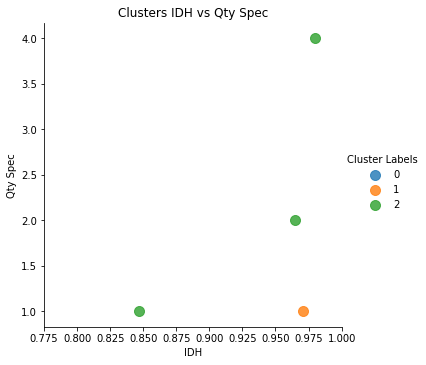

In [88]:
import seaborn as sns
#Scatter plot of Venue and Locarion
sns.lmplot('IDH', 'Name', 
           data=lista, 
           fit_reg=False, 
           hue="Cluster Labels",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters IDH vs Qty Spec')
plt.xlabel('IDH')
plt.ylabel('Qty Spec')